# 輸入與輸出操作

一般的原則是，不管是在金融環境還是其他任何應用領域，大部分的數據都保存在HDD或SSD等等，然而RAM增長的速度永遠不及資料的增長速度，這就使得，將數據儲存到硬碟不僅為了永久儲存，也為了彌補RAM不足的問題  
因此，輸入與輸出操作通常是數據密集型應用中擔任非常重要的任務，他們往往代表著性能關鍵計算的瓶頸，因為I/O操作一般無法已足夠快的速度將數據寫入和寫出RAM，在某種意義上，CPU常常因為緩慢的I/O操作而挨餓

至於頻率，單一金融分析任務通常處理的數據不超過幾個GB---這是python及其與科學有關的library(Numpy, pandas等等)最有效的區域，這樣的大小也能在RAM中分析

### Python的基本I/O

為了以後使用或與他人共享，人們可能想將Python物件存在硬碟上，選項之一就是使用pickle模組，這個模組可以序列化大部分的python物件，序列化是指將物件轉換成一個類似字串的東西

In [1]:
path = './flash/data/'

In [2]:
import numpy as np
from random import gauss

In [3]:
a = [gauss(1.5, 2) for i in range(1000000)]

In [4]:
import pickle

In [5]:
pkl_file = open(path + 'data.pkl', 'w')

我們需要的兩個重要函數是寫入物件的dump和將物件載入到記憶體的load

In [6]:
%time pickle.dump(a, pkl_file)

CPU times: user 4.87 s, sys: 175 ms, total: 5.05 s
Wall time: 5.82 s


In [7]:
pkl_file

<open file './flash/data/data.pkl', mode 'w' at 0x1045c8030>

In [8]:
pkl_file.close()

現在我們可以檢查硬碟中的檔案大小，包含100萬個浮點數約占據20兆bytes(20MB)的空間

In [9]:
ll $path*

-rw-r--r--  1 andy  staff  20972736 Sep  5 22:45 ./flash/data/data.pkl


讀取到記憶體

In [10]:
pkl_file = open(path + 'data.pkl', 'r')

In [11]:
%time b = pickle.load(pkl_file)

CPU times: user 3.91 s, sys: 89.7 ms, total: 4 s
Wall time: 4.54 s


In [12]:
b[:5]

[2.823126620747689,
 1.0280410090287773,
 1.626309977882547,
 1.1439860186783033,
 1.1165402195921343]

和原始的做比較

In [13]:
a[:5]

[2.823126620747689,
 1.0280410090287773,
 1.626309977882547,
 1.1439860186783033,
 1.1165402195921343]

為了確表a和b是否相同

In [14]:
np.allclose(np.array(a), np.array(b))

True

In [15]:
np.sum(np.array(a) - np.array(b))

0.0

若我們想保存csv的文件並共享

In [16]:
rows = 5000
a = np.random.standard_normal((rows, 5))

In [17]:
a.round(4) #四捨五入

array([[-0.4058, -0.2614,  2.4762,  1.1717, -1.2674],
       [-0.5421,  2.1783, -0.0069, -0.4229,  1.8566],
       [ 0.3943, -0.882 ,  0.2549, -0.1074,  1.2391],
       ..., 
       [-0.6399, -1.1413,  1.0409,  1.6986,  1.6617],
       [ 2.0835, -1.2628,  1.7035,  0.5372, -0.0759],
       [-0.2225,  0.5213, -0.6776,  0.0334,  0.3402]])

為了使例子更逼真，我們添加日期

In [18]:
import pandas as pd
t = pd.date_range(start='2014/01/01', periods=rows, freq='H')

In [19]:
t

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-07-27 22:00:00', '2014-07-27 23:00:00',
               '2014-07-28 00:00:00', '2014-07-28 01:00:00',
               '2014-07-28 02:00:00', '2014-07-28 03:00:00',
               '2014-07-28 04:00:00', '2014-07-28 05:00:00',
               '2014-07-28 06:00:00', '2014-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [20]:
csv_file = open(path + 'data.csv', 'w') #open file for writing

csv文件的第一行通常包含保存保存在文件中每個column的名稱，所以我們先寫入他

In [21]:
header = 'data,no1,no2,no3,no4,no5\n'
csv_file.write(header)

然後逐行寫入數據

In [22]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [23]:
ls -lh $path*

-rw-r--r--  1 andy  staff   330K Sep  5 22:45 ./flash/data/data.csv
-rw-r--r--  1 andy  staff    20M Sep  5 22:45 ./flash/data/data.pkl


另外一個是打開現存的csv文件

In [24]:
csv_file = open(path + 'data.csv', 'r')
for i in range(5):
    print csv_file.readline()

data,no1,no2,no3,no4,no5

2014-01-01 00:00:00,-0.405831,-0.261370,2.476171,1.171715,-1.267439

2014-01-01 01:00:00,-0.542052,2.178313,-0.006876,-0.422945,1.856569

2014-01-01 02:00:00,0.394290,-0.882014,0.254935,-0.107400,1.239105

2014-01-01 03:00:00,-0.580763,0.331204,1.307750,1.180305,-0.161587



也可以一次讀出所有

In [25]:
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines()
for line in content[:5]:
    print line

data,no1,no2,no3,no4,no5

2014-01-01 00:00:00,-0.405831,-0.261370,2.476171,1.171715,-1.267439

2014-01-01 01:00:00,-0.542052,2.178313,-0.006876,-0.422945,1.856569

2014-01-01 02:00:00,0.394290,-0.882014,0.254935,-0.107400,1.239105

2014-01-01 03:00:00,-0.580763,0.331204,1.307750,1.180305,-0.161587



最後，關閉操作完成本例

In [26]:
csv_file.close()
!rm -f $path*

### SQL資料庫

python可以使用任何類型的SQL資料庫，通常也可以利用nosql資料庫，python預設有自帶SQLite3資料庫

In [27]:
import sqlite3 as sq3

In [28]:
query = 'create table numbs(Date date, No1 real, No2 real)'

生成一個資料庫

In [29]:
con = sq3.connect(path + 'numbs.db')

In [30]:
con.execute(query)

In [31]:
con.commit() #使查詢生效

接下來，我們可以填入數據

In [32]:
import datetime as dt

In [33]:
con.execute('insert into numbs values(?, ?, ?)', (dt.datetime.now(), 0.12, 7.3))

批量寫入

In [34]:
data = np.random.standard_normal((10000, 2)).round(5)

In [35]:
for row in data:
    con.execute('insert into numbs values(?, ?, ?)', (dt.datetime.now(), row[0], row[1]))

使用fetchmany一次從資料庫讀去一定數量筆資料

In [36]:
con.execute('select * from numbs').fetchmany(10)

[(u'2016-09-05 22:45:23.993374', 0.12, 7.3),
 (u'2016-09-05 22:45:24.017593', 1.18123, -0.62186),
 (u'2016-09-05 22:45:24.017742', 0.29622, -0.43076),
 (u'2016-09-05 22:45:24.017787', 1.17846, -0.54809),
 (u'2016-09-05 22:45:24.017944', 0.63124, 0.81232),
 (u'2016-09-05 22:45:24.018003', -1.70138, 1.15917),
 (u'2016-09-05 22:45:24.018156', 0.42063, -1.41777),
 (u'2016-09-05 22:45:24.018200', 1.78402, 1.1712),
 (u'2016-09-05 22:45:24.018229', -0.66828, 0.48891),
 (u'2016-09-05 22:45:24.018252', -0.98302, 1.23905)]

也可以一行一行讀入

In [37]:
pointer = con.execute('select * from numbs')

In [38]:
for i in range(3):
    print pointer.fetchone()

(u'2016-09-05 22:45:23.993374', 0.12, 7.3)
(u'2016-09-05 22:45:24.017593', 1.18123, -0.62186)
(u'2016-09-05 22:45:24.017742', 0.29622, -0.43076)


In [39]:
con.close()
!rm -f $path*

### 讀寫Numpy

為了說明numpy是基於sql方法的高效替代品，我們重複前面的例子

In [40]:
import numpy as np

In [41]:
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00', dtype='datetime64[m]') # minute intervals
len(dtimes)

3681360

SQL中的table是numpy中的結構陣列，我們使用特殊的dtype物件鏡像前面的SQL table

In [42]:
dty = np.dtype([('Date','datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
data = np.zeros(len(dtimes), dtype=dty)

In [43]:
dty

dtype([('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [44]:
data[:5]

array([(datetime.datetime(1970, 1, 1, 0, 0), 0.0, 0.0),
       (datetime.datetime(1970, 1, 1, 0, 0), 0.0, 0.0),
       (datetime.datetime(1970, 1, 1, 0, 0), 0.0, 0.0),
       (datetime.datetime(1970, 1, 1, 0, 0), 0.0, 0.0),
       (datetime.datetime(1970, 1, 1, 0, 0), 0.0, 0.0)], 
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [45]:
data['Date'] = dtimes

In [46]:
a = np.random.standard_normal((len(dtimes), 2)).round(5)
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

ndarray物件的保存經過了高度的優化，因此相當快速，在硬碟裡保存近60MB的數據只花將近0.2秒

In [47]:
%time np.save(path + 'array', data)

CPU times: user 3.67 ms, sys: 85.3 ms, total: 88.9 ms
Wall time: 129 ms


In [48]:
ll $path*

-rw-r--r--  1 andy  staff  58901888 Sep  5 22:45 ./flash/data/array.npy


In [49]:
%time np.load(path + 'array.npy')

CPU times: user 1.84 ms, sys: 57 ms, total: 58.8 ms
Wall time: 59.6 ms


array([ (datetime.datetime(2015, 1, 1, 10, 0), -0.7901800274848938, 0.14168000221252441),
       (datetime.datetime(2015, 1, 1, 10, 1), -3.1427299976348877, 0.6948699951171875),
       (datetime.datetime(2015, 1, 1, 10, 2), -0.12678000330924988, -1.4783999919891357),
       ...,
       (datetime.datetime(2021, 12, 31, 21, 57), 1.0341399908065796, -1.3366999626159668),
       (datetime.datetime(2021, 12, 31, 21, 58), 1.078220009803772, -0.1642799973487854),
       (datetime.datetime(2021, 12, 31, 21, 59), -0.7475200295448303, -0.3818199932575226)], 
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

60MB其實不太大，我們嘗試一個更大的ndarray

In [50]:
data = np.random.standard_normal((10000, 6000))

In [51]:
%time np.save(path + 'array', data)

CPU times: user 23.6 ms, sys: 863 ms, total: 886 ms
Wall time: 1.45 s


In [52]:
ls -lh $path*

-rw-r--r--  1 andy  staff   458M Sep  5 22:45 ./flash/data/array.npy


大小458M，寫入時間不到兩秒

In [53]:
%time np.load(path + 'array.npy')

CPU times: user 1.76 ms, sys: 420 ms, total: 422 ms
Wall time: 492 ms


array([[-0.12831271,  0.54476521,  1.76112909, ...,  2.10799449,
         0.21304211,  1.09435246],
       [-1.84681913,  0.82156318, -1.11858901, ..., -1.46774198,
         0.40663431,  0.44452029],
       [-0.62083053, -0.09637604,  1.9706109 , ...,  0.30779046,
         0.34548538,  0.06282966],
       ..., 
       [ 0.26754622,  0.15456645, -1.10449569, ..., -0.75736279,
        -0.24474945, -2.00200739],
       [-0.9773895 , -0.14290108, -0.16992459, ...,  0.57553496,
         0.38254263,  0.34006981],
       [ 0.93332184,  1.01692083, -1.08660648, ...,  0.8481554 ,
        -0.62681018,  1.52753186]])

In [54]:
data = 0.0

In [55]:
!rm -f $path*

### Pandas的I/O

pandas庫主要的優勢在於可以原生讀取和寫入不同的資料格式，包括：
+ CSV
+ SQL 
+ XLS/XSLX (Excel文件)
+ JSON
+ HTML

In [56]:
data = np.random.standard_normal((1000000, 5)).round(5)
filename = path + 'numbs'

我們將再次使用SQLite3，比較使用pandas的性能

In [57]:
query = 'create table numbers(No1 real, No2 real, No3 real, No4 real, No5 real)'

In [58]:
con = sq3.Connection(filename + '.db')
con.execute(query)

使用executemany

In [59]:
%time con.executemany('insert into numbers values(?, ?, ?, ?, ?)', data)
con.commit()

CPU times: user 12.6 s, sys: 288 ms, total: 12.9 s
Wall time: 15.3 s


寫入一百萬行的資料要花上一段時間，要讀取卻快得多

In [60]:
%time temp = con.execute('select * from numbers').fetchall()
print temp[:2]
temp = 0.0

CPU times: user 2.37 s, sys: 169 ms, total: 2.54 s
Wall time: 2.65 s
[(-1.82589, 1.24019, 1.17156, -0.13081, 0.86319), (0.804, 0.75663, 0.20858, 1.76103, -0.09477)]


直接將sql查詢結果讀入numpy很容易實現，當然，也很容易繪製這些圖表

In [61]:
%%time 
query = 'select * from numbers where No1 > 0 and No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

CPU times: user 937 ms, sys: 46.4 ms, total: 983 ms
Wall time: 995 ms


In [62]:
!ls -lh $path*

-rw-r--r--  1 andy  staff    50M Sep  5 22:45 ./flash/data/numbs.db


In [63]:
res = res[::100] #every 100th result
import matplotlib.pyplot as plt
%matplotlib inline

(-4.5, 0.5)

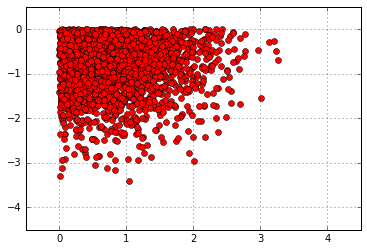

In [64]:
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True)
plt.xlim(-0.5, 4.5)
plt.ylim(-4.5, 0.5)

### 從SQL到pandas

用pandas讀取整個table通常更為高效，在可以將整個table讀入RAM時，分析查詢的執行通常比使用硬碟的sql還快

In [65]:
import pandas.io.sql as pds

用pandas讀取資料庫的速度和numpy時間大致相同

In [66]:
%time data = pds.read_sql('select * from numbers', con)

CPU times: user 2.86 s, sys: 246 ms, total: 3.11 s
Wall time: 3.18 s


In [67]:
data.head()

,No1,No2,No3,No4,No5
0,-1.82589,1.24019,1.17156,-0.13081,0.86319
1,0.80400,0.75663,0.20858,1.76103,-0.09477
2,-0.77690,0.97836,-0.34011,-0.48293,-1.11642
3,-0.01345,-1.88738,0.18969,2.60714,0.69958
4,-0.71561,1.74196,-0.44624,0.59453,0.65728


數據存在RAM中，可以進行更快的分析，在sqlite3中需要幾秒鐘才能完成的SQL查詢，pandas在RAM中只需要不到0.1秒

In [68]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

CPU times: user 28.4 ms, sys: 14.2 ms, total: 42.6 ms
Wall time: 43.3 ms


,No1,No2,No3,No4,No5
8,0.38700,-2.77430,0.56541,0.30888,-0.36657
11,1.71350,-1.21075,0.47103,0.49882,-1.45740
12,0.77444,-1.96591,1.54327,1.06351,0.89126
13,2.53564,-0.09313,0.53003,-1.03364,0.55096
16,0.68284,-0.12181,-0.55478,0.61950,0.83208


### CSV數據操作

In [69]:
%time data.to_csv(filename + '.csv')

CPU times: user 12.6 s, sys: 308 ms, total: 12.9 s
Wall time: 12.9 s


CPU times: user 1.63 s, sys: 142 ms, total: 1.77 s
Wall time: 1.79 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128d2af10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10bbddcd0>]], dtype=object)

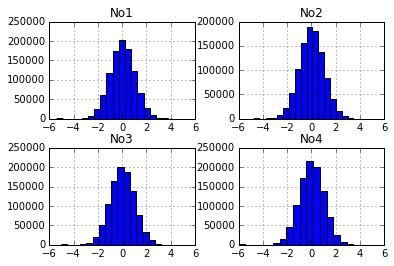

In [70]:
%time pd.read_csv(filename + '.csv')[['No1', 'No2', 'No3', 'No4']].hist(bins=20)

### Excel數據操作

In [71]:
%time data[:100000].to_excel(filename + '.xlsx')

CPU times: user 22.4 s, sys: 625 ms, total: 23 s
Wall time: 23.1 s


CPU times: user 15.7 s, sys: 225 ms, total: 15.9 s
Wall time: 16.2 s


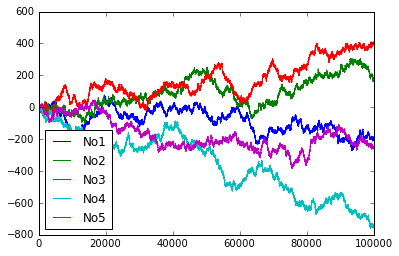

In [72]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()

In [73]:
!ls -lh $path*

-rw-r--r--  1 andy  staff    47M Sep  5 22:46 ./flash/data/numbs.csv
-rw-r--r--  1 andy  staff    50M Sep  5 22:45 ./flash/data/numbs.db
-rw-r--r--  1 andy  staff   4.2M Sep  5 22:46 ./flash/data/numbs.xlsx


In [74]:
!rm -f $path*

操作Excel數據一般會花費一段時間

### PyTables的快速I/O

Pytables是Python與HDF5資料庫的結合(http://www.hdfgroup.org)  
他專門為優化I/O操作的性能，以及最大限度地利用可用硬體而設計，此外，他可以高效能的儲存Numpy陣列

In [75]:
import tables as tb

In [76]:
filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w')

In [77]:
rows = 2000000

這個表本身有一個datetime、兩個int、兩個float

In [78]:
row_des = {
    'Date': tb.StringCol(26, pos=1),
    'No1': tb.IntCol(pos=2),
    'No2': tb.IntCol(pos=3),
    'No3': tb.Float64Col(pos=4),
    'No4': tb.Float64Col(pos=5)
}

我們先不要壓縮

In [79]:
filters = tb.Filters(complevel=0) #不壓縮
tab = h5.create_table('/', 'int_floats', row_des, title='Integers and Floats', expectedrows=rows, filters=filters)

In [80]:
tab

/int_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [81]:
pointer = tab.row

我們現在生成樣本

In [82]:
ran_int = np.random.randint(0, 10000, size=(rows, 2))
ran_flo = np.random.standard_normal((rows,2),).round(5)

將數據寫入資料庫

In [83]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 0]
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 0]
    pointer.append()
tab.flush()

CPU times: user 12.4 s, sys: 322 ms, total: 12.7 s
Wall time: 13.2 s


flush有點類似sqlite3中的commit，提交更改

In [84]:
!ls -lh $path*

-rw-r--r--  1 andy  staff    96M Sep  5 22:47 ./flash/data/tab.h5


使用Numpy，可以更高性能更Python風格的方式實現相同的結果

In [85]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])
sarray = np.zeros(len(ran_int), dtype=dty)

In [86]:
sarray

array([('', 0, 0, 0.0, 0.0), ('', 0, 0, 0.0, 0.0), ('', 0, 0, 0.0, 0.0),
       ..., ('', 0, 0, 0.0, 0.0), ('', 0, 0, 0.0, 0.0),
       ('', 0, 0, 0.0, 0.0)], 
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [87]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_int[:, 0]
sarray['No4'] = ran_int[:, 1]

CPU times: user 120 ms, sys: 44.2 ms, total: 164 ms
Wall time: 259 ms


In [88]:
%%time
h5.create_table('/', 'int_floats_from_array', sarray, title='Integers and Floats', expectedrows=rows, filters=filters)

CPU times: user 36.2 ms, sys: 62.2 ms, total: 98.4 ms
Wall time: 187 ms


/int_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [89]:
h5

File(filename=./flash/data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/int_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/int_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

刪除重複的table

In [90]:
h5.remove_node('/', 'int_floats_from_array')

In [91]:
tab[:3]

array([('2016-09-05 22:46:58.634139', 7180, 7180, 1.21549, 1.21549),
       ('2016-09-05 22:46:58.634249', 1324, 1324, 0.61825, 0.61825),
       ('2016-09-05 22:46:58.634261', 1857, 1857, -0.3584, -0.3584)], 
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

我們可以對table的資料使用numpy的函數

In [92]:
%time np.sum(tab[:]['No3'])

CPU times: user 61 ms, sys: 119 ms, total: 180 ms
Wall time: 338 ms


-713.67336999999998

### 使用壓縮表

pytables的主要優勢之一就是壓縮方法

In [93]:
filename = path + 'tab.h5c'
h5c = tb.open_file(filename, 'w')

In [94]:
filters = tb.Filters(complevel=4, complib='blosc')

In [95]:
tabc = h5c.create_table('/', 'ints_floats', sarray, title='Integers and Floats', expectedrows=rows, filters=filters)

In [96]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
               tabc.where('((No3 < -0.5) | (No3 > 0.5)) & ((No4 < -1) | (No4 > 1))')])[::100]

CPU times: user 2.97 s, sys: 229 ms, total: 3.2 s
Wall time: 3.36 s


生成壓縮的table比生成未壓縮的慢，那讀入ndarray的會如何呢？

In [97]:
%time arr_non = tab.read()

CPU times: user 38.4 ms, sys: 74.7 ms, total: 113 ms
Wall time: 133 ms


In [98]:
%time arr_com = tabc.read()

CPU times: user 191 ms, sys: 56.2 ms, total: 247 ms
Wall time: 259 ms


這種方法花的時間確實比以前長，但是壓縮率大約為20%，節省硬碟80%的空間，對於備份或是交換數據可能很重要

In [99]:
!ls -lh $path*

-rw-r--r--  1 andy  staff   191M Sep  5 22:47 ./flash/data/tab.h5
-rw-r--r--  1 andy  staff    18M Sep  5 22:47 ./flash/data/tab.h5c


In [100]:
h5c.close()

### 記憶體外的計算

pytables支持記憶體外的計算，因此可以實現不適合在記憶體的運算

In [101]:
filename = path + 'array.h5'
h5 = tb.open_file(filename, 'w')

In [102]:
n = 1000
ear = h5.create_earray(h5.root, 'ear', atom=tb.Float64Atom(), shape=(0, n))

In [103]:
%%time
rand = np.random.standard_normal((n, n))
for i in range(750):
    ear.append(rand)
ear.flush()

CPU times: user 2.34 s, sys: 6.25 s, total: 8.59 s
Wall time: 13.8 s


為了從邏輯上和物理上檢查生成數據的多少，我們可以檢查metadata和硬碟空間消耗

In [104]:
ear

/ear (EArray(750000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [105]:
ear.size_on_disk

6000000000L

ear物件有6GB大

In [106]:
out = h5.create_earray(h5.root, 'out', atom=tb.Float64Atom(), shape=(0, 1))

Pytables有一個特殊模組，可以高效能的處理數值表達式，我們希望用這個模組計算如下的公式$$y=3\times sin(x)+\sqrt{\left | x \right |}$$

In [107]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')
expr.set_output(out, append_mode=True)

/Users/andy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: setOutput() is pending deprecation, use set_output() instead. You may use the pt2to3 tool to update your source code.
  from ipykernel import kernelapp as app


In [ ]:
%time expr.eval()

In [108]:
out[:, :10]

array([], shape=(0, 1), dtype=float64)

我們在簡單地將其與numexpr模組中在記憶體計算的性能做比較

In [109]:
%time imarray = ear.read()

CPU times: user 3.83 s, sys: 10.1 s, total: 13.9 s
Wall time: 41 s


In [110]:
import numexpr as ne
expr = '3 * sin(imarray) + sqrt(abs(imarray))'

In [111]:
ne.set_num_threads(16)
%time ne.evaluate(expr[0, :10])

4

In [112]:
h5.close()


In [113]:
!rm -f $path*